# <center> Building a Financial Chatbot

The following is the script for creation of financial chatbot which I named as **FinBot**, which is a python-based AI financial chatbot that provides responses to user queries (build on the basis of pre-defined questions and results attained through Task 1 in the current Job simulation). This bot is designed in March, 2025 and hence it only provides data prior to 3 years from now.

In [12]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Financial Data

In [10]:
def load_data():
    try:
        final_report = pd.read_csv(r"C:\Users\dp1257\Downloads\final_data_report.csv")
        summary_report = pd.read_csv(r"C:\Users\dp1257\Downloads\summary_report")
        print("Financial data successfully loaded!")
        return final_report, summary_report
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None

# Greeting Function
Greeting the User and Initial Interaction

In [1]:
def greet_user():
    print("Hello! I am FinBot, your AI financial assistant.")
    response = input("Would you like to chat about financial information? (yes/no): ").strip().lower()
    
    if response in ["yes", "y", "yeah", "sure", "ok"]:
        return True
    else:
        print("Thank you! Have a great day!")
        return False

# Display Menu Options
Display Available Areas of Inquiry

In [13]:
def show_options():
    print("\nI can assist you with the following financial topics:")
    options = [
        "1. Revenue & Net Income Analysis",
        "2. Assets & Liabilities Trends",
        "3. Cash Flow & Financial Health",
        "4. Compare Financial Trends (Graphs)",
        "5. Exit"
    ]
    for option in options:
        print(option)
    
    choice = input("\nPlease select an option (1-5): ").strip()
    return choice

# Retrieving Financial Data
Fetching answers based on supplied data

In [14]:
def fetch_financial_info(choice, final_report, summary_report):
    if choice == "1":
        print("\nYou chose: Revenue & Net Income Analysis")
        company = input("Enter the company name (Apple/Microsoft/Tesla): ").strip()
        
        if company not in final_report["Company"].values:
            print("Sorry, no data available for this company.")
            return
        
        latest_year = final_report[final_report["Company"] == company]["Year"].max()
        latest_data = final_report[(final_report["Company"] == company) & (final_report["Year"] == latest_year)]
        
        revenue = latest_data["Total Revenue"].values[0]
        net_income = latest_data["Net Income"].values[0]
        revenue_growth = latest_data["Revenue Growth (%)"].values[0]
        net_income_growth = latest_data["Net Income Growth (%)"].values[0]
        
        print(f"\n{company}'s Financials for {latest_year}:")
        print(f"Total Revenue: ${revenue}")
        print(f"Net Income: ${net_income}")
        print(f"Revenue Growth: {revenue_growth:.2f}%")
        print(f"Net Income Growth: {net_income_growth:.2f}%")

    elif choice == "2":
        print("\nYou chose: Assets & Liabilities Trends")
        company = input("Enter the company name (Apple/Microsoft/Tesla): ").strip()

        if company not in final_report["Company"].values:
            print("Sorry, no data available for this company.")
            return
        
        latest_year = final_report[final_report["Company"] == company]["Year"].max()
        latest_data = final_report[(final_report["Company"] == company) & (final_report["Year"] == latest_year)]
        
        assets = latest_data["Total Assets"].values[0]
        liabilities = latest_data["Total Liabilities"].values[0]
        assets_growth = latest_data["Assets Growth (%)"].values[0]
        liabilities_growth = latest_data["Liabilities Growth (%)"].values[0]
        
        print(f"\n{company}'s Financials for {latest_year}:")
        print(f"Total Assets: ${assets}")
        print(f"Total Liabilities: ${liabilities}")
        print(f"Assets Growth: {assets_growth:.2f}%")
        print(f"Liabilities Growth: {liabilities_growth:.2f}%")

    elif choice == "3":
        print("\nYou chose: Cash Flow & Financial Health")
        company = input("Enter the company name (Apple/Microsoft/Tesla): ").strip()

        if company not in final_report["Company"].values:
            print("Sorry, no data available for this company.")
            return
        
        latest_year = final_report[final_report["Company"] == company]["Year"].max()
        latest_data = final_report[(final_report["Company"] == company) & (final_report["Year"] == latest_year)]
        
        cash_flow = latest_data["Cash Flow from Operating Activities"].values[0]
        cash_flow_growth = latest_data["Cash Flow Growth (%)"].values[0]
        
        print(f"\n{company}'s Financials for {latest_year}:")
        print(f"Cash Flow from Operating Activities: ${cash_flow}")
        print(f"Cash Flow Growth: {cash_flow_growth:.2f}%")

    elif choice == "4":
        print("\nYou chose: Compare Financial Trends")
        print("Available comparisons: ")
        print("1. Revenue Trends")
        print("2. Net Income Trends")
        print("3. Cash Flow Trends")
        
        sub_choice = input("\nEnter the option number (1-3): ").strip()
        
        if sub_choice == "1":
            fetch_comparison(final_report, "Total Revenue", "Revenue ($M)")
        elif sub_choice == "2":
            fetch_comparison(final_report, "Net Income", "Net Income ($M)")
        elif sub_choice == "3":
            fetch_comparison(final_report, "Cash Flow from Operating Activities", "Cash Flow ($M)")
        else:
            print("Invalid option selected. Returning to main menu.")

    elif choice == "5":
        print("Thank you for using FinBot. Have a great day!")
        return False
    
    else:
        print("Sorry, I didn't understand that. Please choose a valid option.")
    
    return True

In [15]:
# Plot Financial Trends for a Single Company
def plot_trend(final_report, company, metric, metric_label):
    """Function to plot financial trends for a company."""
    data = final_report[final_report["Company"] == company]
    
    if data.empty:
        print(f"No data available for {company}.")
        return
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=data["Year"], y=data[metric], marker="o", label=company)
    
    plt.title(f"{metric_label} Trend for {company}", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(metric_label, fontsize=12)
    plt.legend()
    plt.grid(True)
    
    plt.show()

In [16]:
# Compare Financial Metrics Across Companies
def fetch_comparison(final_report, metric, metric_label):
    """Function to compare financial metrics across companies."""
    companies = final_report["Company"].unique()
    
    plt.figure(figsize=(8, 5))
    
    for company in companies:
        data = final_report[final_report["Company"] == company]
        if not data.empty:
            sns.lineplot(x=data["Year"], y=data[metric], marker="o", label=company)
    
    plt.title(f"{metric_label} Comparison", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(metric_label, fontsize=12)
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Main Function to Run the Chatbot

In [17]:
def main():
    final_report, summary_report = load_data()
    
    if final_report is None or summary_report is None:
        print("Unable to load financial data. Exiting.")
        return

    if not greet_user():
        return
    
    while True:
        choice = show_options()
        if not fetch_financial_info(choice, final_report, summary_report):
            break
        
        further_input = input("\nWould you like to ask another question? (yes/no): ").strip().lower()
        if further_input not in ["yes", "y"]:
            print("Thank you for using FinBot! Goodbye.")
            break

Financial data successfully loaded!
Hello! I am FinBot, your AI financial assistant.


Would you like to chat about financial information? (yes/no):  Y



I can assist you with the following financial topics:
1. Revenue & Net Income Analysis
2. Assets & Liabilities Trends
3. Cash Flow & Financial Health
4. Compare Financial Trends (Graphs)
5. Exit



Please select an option (1-5):  4



You chose: Compare Financial Trends
Available comparisons: 
1. Revenue Trends
2. Net Income Trends
3. Cash Flow Trends



Enter the option number (1-3):  1


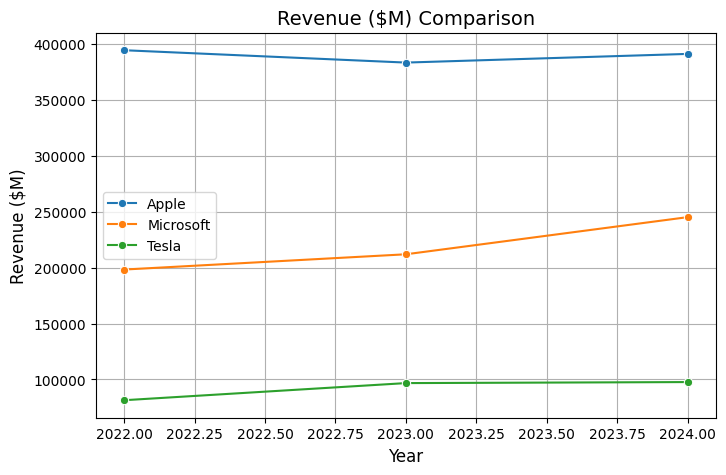


Would you like to ask another question? (yes/no):  yes



I can assist you with the following financial topics:
1. Revenue & Net Income Analysis
2. Assets & Liabilities Trends
3. Cash Flow & Financial Health
4. Compare Financial Trends (Graphs)
5. Exit



Please select an option (1-5):  4



You chose: Compare Financial Trends
Available comparisons: 
1. Revenue Trends
2. Net Income Trends
3. Cash Flow Trends



Enter the option number (1-3):  3


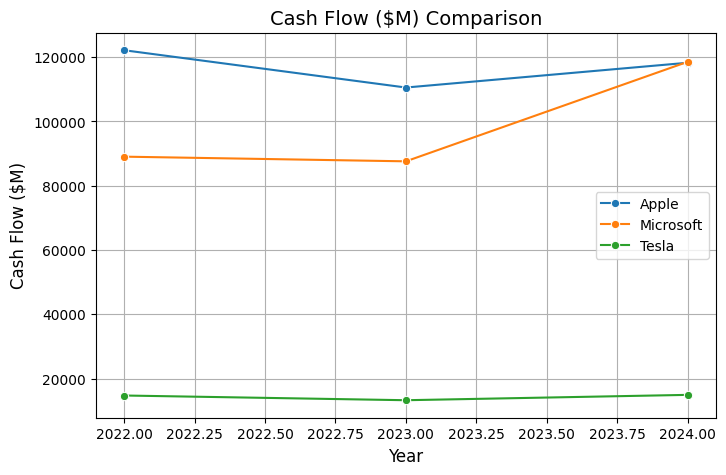


Would you like to ask another question? (yes/no):  YEah


Thank you for using FinBot! Goodbye.


In [18]:
# Run the chatbot
main()

In [19]:
# Run the chatbot
main()

Financial data successfully loaded!
Hello! I am FinBot, your AI financial assistant.


Would you like to chat about financial information? (yes/no):  Y



I can assist you with the following financial topics:
1. Revenue & Net Income Analysis
2. Assets & Liabilities Trends
3. Cash Flow & Financial Health
4. Compare Financial Trends (Graphs)
5. Exit



Please select an option (1-5):  2



You chose: Assets & Liabilities Trends


Enter the company name (Apple/Microsoft/Tesla):  Microsoft



Microsoft's Financials for 2024:
Total Assets: $512163
Total Liabilities: $243686
Assets Growth: 0.00%
Liabilities Growth: 0.00%



Would you like to ask another question? (yes/no):  Exit


Thank you for using FinBot! Goodbye.
